## Explorations tableaux

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_customers = pd.read_csv('customers.csv')

In [4]:
df_customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [5]:
df_customers.client_id.nunique()

8623

In [6]:
df_customers.shape

(8623, 3)

In [7]:
df_products= pd.read_csv('products.csv')

In [8]:
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [9]:
df_products.id_prod.value_counts()

0_1802    1
1_3       1
0_730     1
0_2026    1
2_161     1
         ..
1_66      1
1_649     1
0_379     1
0_864     1
0_237     1
Name: id_prod, Length: 3287, dtype: int64

In [10]:
df_products.id_prod.nunique()

3287

In [11]:
df_products.shape

(3287, 3)

In [12]:
df_transactions = pd.read_csv('transactions.csv')

In [13]:
df_transactions.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [14]:
# fusion des 3 tables 
df = pd.merge(df_transactions,df_products,on='id_prod',how='left')

In [15]:
df= pd.merge(df, df_customers, on='client_id', how= 'left')

In [16]:
df.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980


## Mission 1

Nettoyage

In [17]:
val_nul_categ= df['categ'].isna().sum()

In [18]:
df.shape

(337016, 8)

In [19]:
df.isna().sum()*100/df.shape[0]

id_prod       0.000000
date          0.000000
session_id    0.000000
client_id     0.000000
price         0.030562
categ         0.030562
sex           0.000000
birth         0.000000
dtype: float64

In [20]:
df['categ'].shape[0]

337016

In [21]:
part_val_nul= (val_nul_categ/df['categ'].shape[0])*100

In [22]:
df['categ'].isna().sum()

103

In [23]:
nan_values = df.isna().sum()
size = df.shape
size

(337016, 8)

In [24]:
nan_values = nan_values.sort_values(ascending=True)*100/size[0]
nan_values

id_prod       0.000000
date          0.000000
session_id    0.000000
client_id     0.000000
sex           0.000000
birth         0.000000
price         0.030562
categ         0.030562
dtype: float64

In [25]:
#diagramme en barre
valeurs_manquantes = df.isna().sum()
valeurs_manquantes

id_prod         0
date            0
session_id      0
client_id       0
price         103
categ         103
sex             0
birth           0
dtype: int64

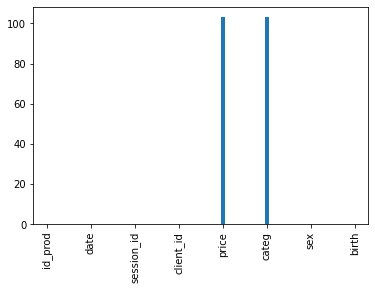

In [26]:
valeurs_manquantes.plot(kind='bar',width=0.1)
plt.show()

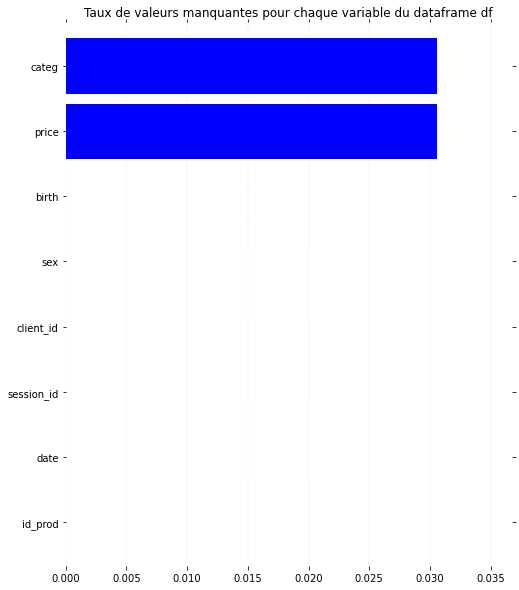

In [27]:
size = df.shape
nan_values = df.isna().sum()

nan_values = nan_values.sort_values(ascending=True)*100/size[0]

ax = nan_values.plot(kind='barh', 
                     figsize=(8, 10), 
                     color='#0000FF',
                     zorder=2,
                     width=0.85)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="both", 
               which="both", 
               bottom="off", 
               top="off", 
               labelbottom="on", 
               left="off", 
               right="off", 
               labelleft="on")
ax.set_title("Taux de valeurs manquantes pour chaque variable du dataframe df")
vals = ax.get_xticks()

for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

In [28]:
nan_values

id_prod       0.000000
date          0.000000
session_id    0.000000
client_id     0.000000
sex           0.000000
birth         0.000000
price         0.030562
categ         0.030562
dtype: float64

## soit supprime, soit moyenne, soit par k plus proches voisins

On peut supprimer les valeurs manquantes car il y en a très très peu 

In [29]:
#je supprime les valeurs manquantes car très peu de valeurs manquantes
df = df.dropna()

In [30]:
df.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
sex           0
birth         0
dtype: int64

# Les valeurs aberrantes 

In [31]:
df['price']

0          4.99
1         65.75
2         10.71
3          4.20
4          8.99
          ...  
337011    31.99
337012    22.99
337013    11.03
337014    50.99
337015    17.99
Name: price, Length: 336913, dtype: float64

<AxesSubplot:xlabel='price'>

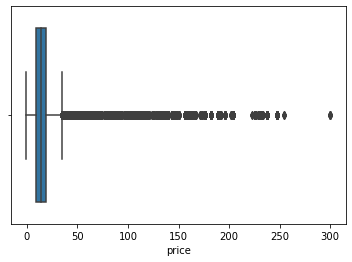

In [32]:
#univariate 
import seaborn as sns
sns.boxplot(x= df['price'])

In [33]:

df['price'].describe()

count    336913.000000
mean         17.204376
std          17.855658
min          -1.000000
25%           8.580000
50%          13.900000
75%          18.990000
max         300.000000
Name: price, dtype: float64

In [34]:
# enlever les valeurs neg

df= df[df['price']>0]

In [35]:
df.shape

(336713, 8)

<AxesSubplot:>

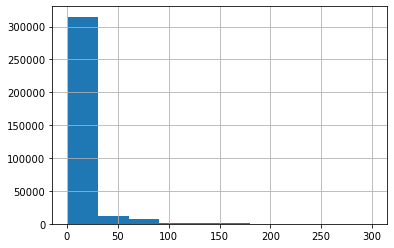

In [36]:
df["price"].hist()

In [37]:
# 1er quartile = 25% 
# 2 eme quartile ou mediane = 50%
# 3 eme quartile 75%
#1er moustache = 1er quartile - 1,5 * intervalleinterquartile 
# 2er moustache = 3er quartile + 1,5 * intervalleinterquartile (diff entre 3 eme quartile et premier quartile)

# pour traiter il faut ramener toutes les valeurs audessus de la 2eme moustache 

In [38]:
# detecter les outliers en utilisant l'interquartile
def detect_outliers_iqr(data):
    price = sorted(list(data['price']))
    q1 = np.nanpercentile(price, 25)
    q3 = np.nanpercentile(price, 75)
    #print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(lwr_bound, upr_bound)
    outliers= data[(data['price']< lwr_bound) |( data['price']> upr_bound)]
    return outliers# Driver code

In [39]:
sample_outliers = detect_outliers_iqr(df)
#print("Outliers from IQR method: ", sample_outliers)
print(sample_outliers.shape)
sample_outliers.head()

-6.959999999999999 34.559999999999995
(20423, 8)


,id_prod,date,session_id,client_id,price,categ,sex,birth
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000
27,2_135,2021-05-26 01:46:59.530702,s_39581,c_5192,68.99,2.0,m,1965
72,1_340,2021-12-01 21:40:04.680653,s_127982,c_6266,42.25,1.0,f,1983
73,2_208,2021-08-21 21:58:40.983725,s_78917,c_7881,54.87,2.0,m,1996
84,1_11,2021-11-03 05:22:29.808605,s_114026,c_5070,39.99,1.0,m,1972


Les valeurs ne sont pas si abberantes que ça. On peut les garder 

In [40]:
#detection des doublons
print(df.shape)


(336713, 8)


In [41]:
df[df.duplicated()]

,id_prod,date,session_id,client_id,price,categ,sex,birth


## Mission 2 : Analyse 

### indicateurs de tendance centrale et de dispersion ;

Le mode

La plupart du temps, je mets entre 40 et 45 min.

Quand votre ami vous dit cela, il vous donne une mesure de tendance centrale qui s'appelle le mode.

Pour les variables qualitatives, ou pour les variables quantitatives discrètes, le mode est la modalité ou la valeur la plus fréquente. Dans notre relevé bancaire, le mode de la variable categ est "Autre", car la modalité "Autre" est présente 212 fois dans l'échantillon, et toutes les autres modalités ("loyer", "courses", etc.) sont présentes moins de fois.

Pour les variables quantitatives continues, on travaille dans le cas agrégé, en regroupant les valeurs par classes. La classe modale est la classe la plus fréquente. Votre ami a découpé sa variable en tranches de 5 minutes, et a déterminé que la tranche la plus fréquente était [40min;45min[
 .
 
 La moyenne 
 
 La médiane
 
 La médiane, (notée Med), est la valeur telle que le nombre d’observations supérieures à cette valeur est égal au nombre d’observations inférieures à cette valeur.

En gros, pour trouver la médiane de vos n
 valeurs, il faut commencer par les trier. Une fois triées, on appelle x(1)
 la première valeur, x(2)
 la deuxième valeur, ... , et x(n)
 la dernière valeur. La médiane, c'est la valeur qui sera exactement au milieu du classement, soit

Med=x(n+12)
M
e
d
=
x
(
n
+
1
2
)


In [42]:
 df.groupby('categ')['price'].describe().reset_index()

,categ,count,mean,std,min,25%,50%,75%,max
0,0.0,209426.0,10.646828,4.930030,0.62,6.30,9.99,14.45,40.99
1,1.0,109735.0,20.480106,7.568956,2.00,15.81,19.08,24.98,80.99
2,2.0,17552.0,75.174949,39.079999,30.99,53.99,62.83,71.21,300.00


In [43]:
categ0 = df[df['categ']==0]
categ1 = df[df['categ']==1]
categ2 = df[df['categ']==2]
price0 = categ0['price']
price1 = categ1['price']
price2 = categ2['price']

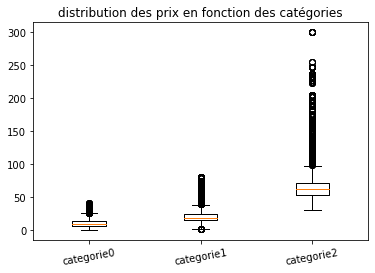

In [44]:
columns = [price0,price1,price2]

plt.subplots()
plt.boxplot(columns)
plt.xticks([1, 2, 3], ["categorie0", "categorie1", "categorie2"], rotation=10)
plt.title("distribution des prix en fonction des catégories")
plt.show()

## les mesures de dispersion

La variance empirique

Devinez quoi ! L'indicateur que nous venons de construire est l'un des plus utilisés en statistiques ! :soleil: Il s'appelle la variance empirique. Comme nous venons de le voir, elle est égale à

v=1n∑i=1n(xi−x⎯⎯⎯)2
v
=
1
n
∑
i
=
1
n
(
x
i
−
x
¯
)
2


Pour approfondir l'aspect calculatoire, rendez-vous à la section Aller plus loin, au bas du chapitre. Aussi, vous trouverez souvent une version "corrigée" de la variance empirique, que l'on qualifie de non biaisée. Je vous renvoie ici aussi à la section Aller plus loin.

L'écart-type empirique

L'écart-type empirique, c'est juste la racine carrée de la variance empirique. On l'appelle en anglais standard deviation, souvent abrégé std. En fait, quand on calcule la variance empirique des temps de trajet, le résultat a pour unité la minute 2
 , ce qui n'est pas très intelligible. En prenant la racine carrée, l'unité redevient la minute. Ici, notre écart-type vaut 6,55 minutes. On le note s
 .

s=v√

Mais lorsque vous faites un trajet, un écart-type de 6,55 minutes sur un trajet de 1 h (1h en moyenne), ce n'est pas la même chose qu'un écart-type de 6,55 minutes sur un trajet de 24 h (24h en moyenne) ! On a donc créé le coefficient de variation, disponible dans la section Aller plus loin.

L'écart inter-quartiles

La boîte à moustaches (boxplot)


In [45]:
#faire avec tableau 
df.columns

Index(['id_prod', 'date', 'session_id', 'client_id', 'price', 'categ', 'sex',
       'birth'],
      dtype='object')

In [46]:
df.groupby(['sex'])['price'].describe().reset_index()


,sex,count,mean,std,min,25%,50%,75%,max
0,f,167515.0,17.067855,17.362773,0.62,8.61,13.94,18.99,300.0
1,m,169198.0,17.361056,18.329061,0.62,8.58,13.89,18.99,300.0


In [47]:
pricebysexf = df[df['sex']=='f']
pricebysexm = df[df['sex']=='m']
pricef = pricebysexf['price']
pricem = pricebysexm['price']

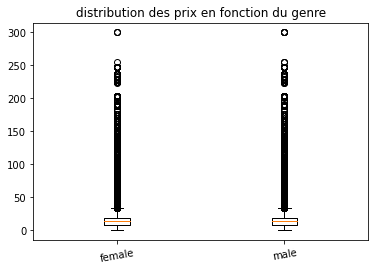

In [48]:
columns = [pricef,pricem]

plt.subplots()
plt.boxplot(columns)
plt.xticks([1, 2], ["female", "male"], rotation=10)
plt.title("distribution des prix en fonction du genre")
plt.show()

## Les mesures de forme

Le Skewness empirique

Devinez quoi ! L'indicateur que nous venons de créer est utilisé par les statisticiens, et s'appelle le skewness empirique. En général, on a l'habitude de nommer le skewness γ1
 , et son numérateur μ3
 :

γ1=μ3s3
γ
1
=
μ
3
s
3
avec μ3=1n∑ni=1(xi−x⎯⎯⎯)3
μ
3
=
1
n
∑
i
=
1
n
(
x
i
−
x
¯
)
3

Le skewness est une mesure d'asymétrie. L’asymétrie d’une distribution traduit la régularité (ou non) avec laquelle les observations se répartissent autour de la valeur centrale. On interprète cette mesure de cette manière :

Si γ1=0
γ
1
=
0
 alors la distribution est symétrique.
Si γ1>0
γ
1
>
0
 alors la distribution est étalée à droite.
Si γ1<0
γ
1
<
0
 alors la distribution est étalée à gauche.
Relation entre la forme de la distribution et le skewness

Le Kurtosis empirique

Le kurtosis empirique n'est pas une mesure d'asymétrie, mais c'est une mesure d'aplatissement. L’aplatissement peut s’interpréter à la condition que la distribution soit symétrique. En fait, on compare l'aplatissement par rapport à la distribution la plus célèbre, appelée distribution normale (parfois "courbe de Gauss" ou "Gaussienne"). Vous l'avez probablement déjà vue, elle ressemble à cela :

Il s’interprète comme ceci :

Si γ2=0
 , alors la distribution a le même aplatissement que la distribution normale.
Si γ2>0
 , alors elle est moins aplatie que la distribution normale : les observations sont plus concentrées.
Si γ2<0
 , alors les observations sont moins concentrées : la distribution est plus aplatie.

## Les mesures de concentration

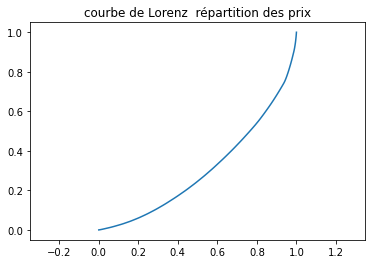

In [49]:
#courbe de Lorenz : permet de voir comment les prix sont répartis en fonction des achats si les prix sont plutôt égalitaire 

price = df['price']
prix = price.values
#longueur des prix 
n = len(prix)
# trier les individus dans l'ordre croissant des valeurs de la variable et calcul de la somme cumulé 
lorenz = np.cumsum(np.sort(prix)) / prix.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.title('courbe de Lorenz  répartition des prix')
plt.show()

In [50]:
#indice de Gini qui est la statistique de la courbe de lorenz. Il calcule Il mesure l'aire présente entre la première bissectrice et la courbe de Lorenz
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.392145510890881

## interprétation de l'indice de Gini

0 est l'égalité parfaite et 1 est l'inagalité parfaite.
0.39 indice de Gini c'est que c'est plutôt egalitaire

## Evolution du prix avec le temps

<ipython-input-51-b971a0e8dd3b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['date'] = pd.to_datetime(df['date'])


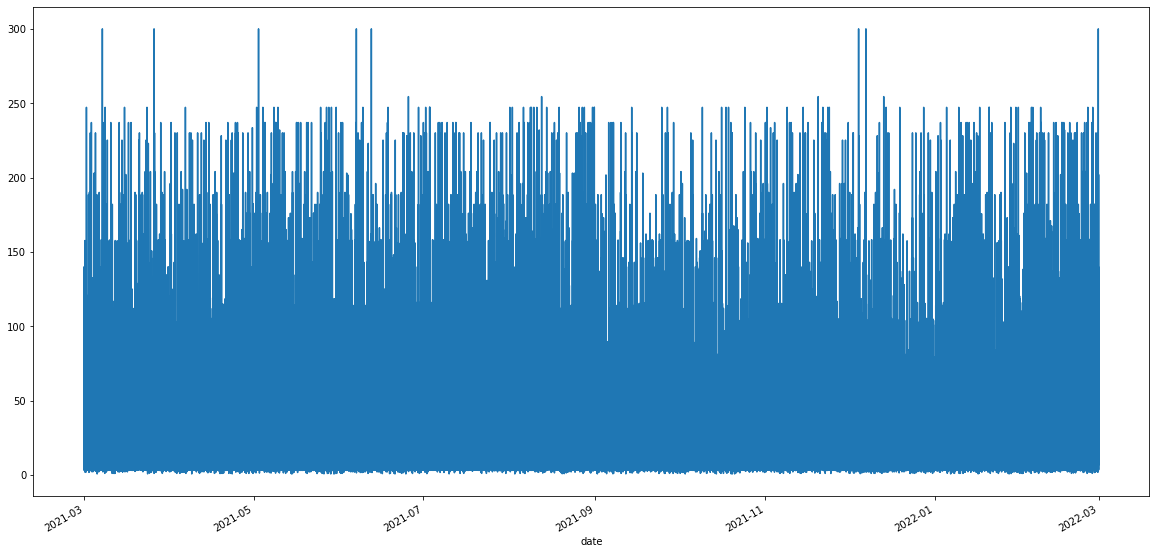

DatetimeIndex(['2021-04-10 18:37:28.723910', '2022-02-03 01:55:53.276402',
               '2021-09-23 15:13:46.938559', '2021-10-17 03:27:18.783634',
               '2021-07-17 20:34:25.800563', '2021-09-15 05:47:48.215162',
               '2021-08-29 05:39:01.055455', '2021-09-19 14:54:52.410362',
               '2022-02-03 07:13:22.559995', '2022-02-26 09:03:10.571665',
               ...
               '2021-10-17 12:47:22.803642', '2021-06-01 12:14:28.924898',
               '2022-01-10 13:47:23.973957', '2021-07-22 13:47:39.400914',
               '2022-02-03 01:39:15.793010', '2021-05-28 12:35:46.214839',
               '2021-06-19 00:19:23.917703', '2021-03-16 17:31:59.442007',
               '2021-10-30 16:50:15.997750', '2021-06-26 14:38:19.732946'],
              dtype='datetime64[ns]', name='date', length=336713, freq=None)

In [51]:
#tracer l'évolution du prix sur le temps
df_date = df[['date','price']]
df_date['date'] = pd.to_datetime(df['date'])
df_date = df_date.set_index('date')
df_date['price'].plot(figsize=(20, 10))
plt.show()

df_date.index

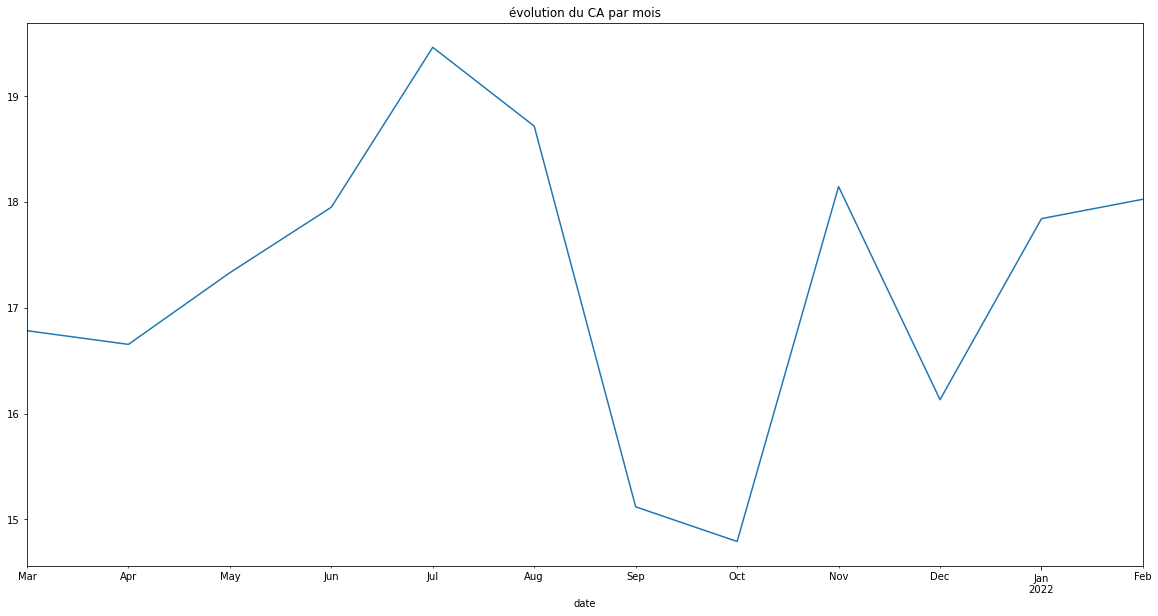

In [52]:
#on fait une moyenne par mois 
df_date_monthly_mean = df_date.resample('M').mean()

df_date_monthly_mean['price'].plot(figsize=(20, 10))
plt.title('évolution du CA par mois')
plt.show()



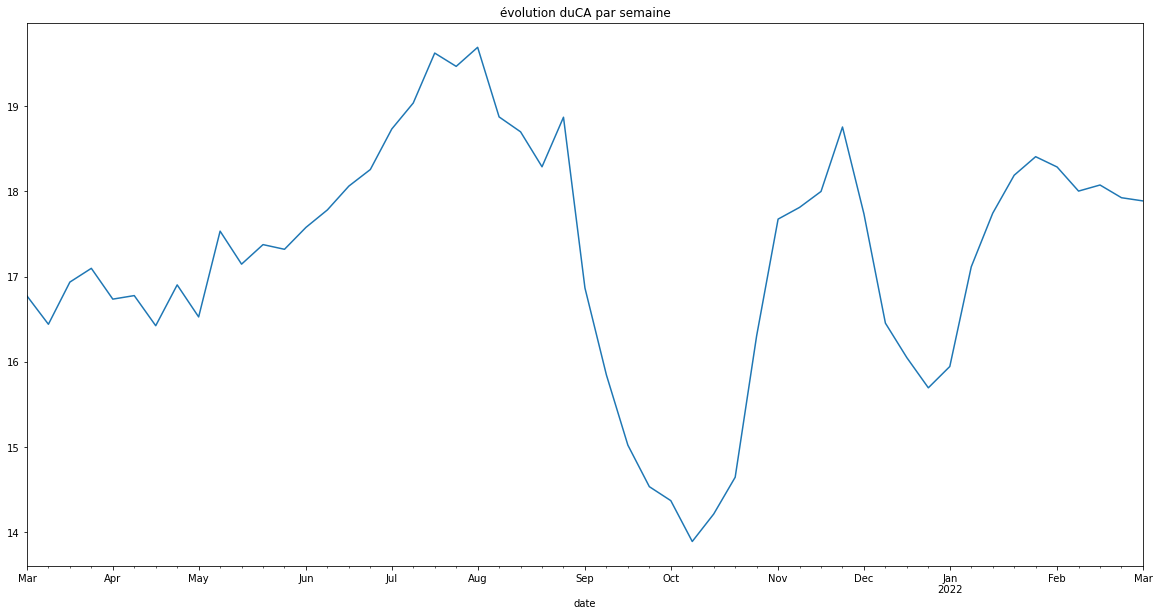

In [53]:
#moyenne par semaine
df_date_weekly_mean = df_date.resample('W').mean()

df_date_weekly_mean['price'].plot(figsize=(20, 10))
plt.title('évolution duCA par semaine')
plt.show()



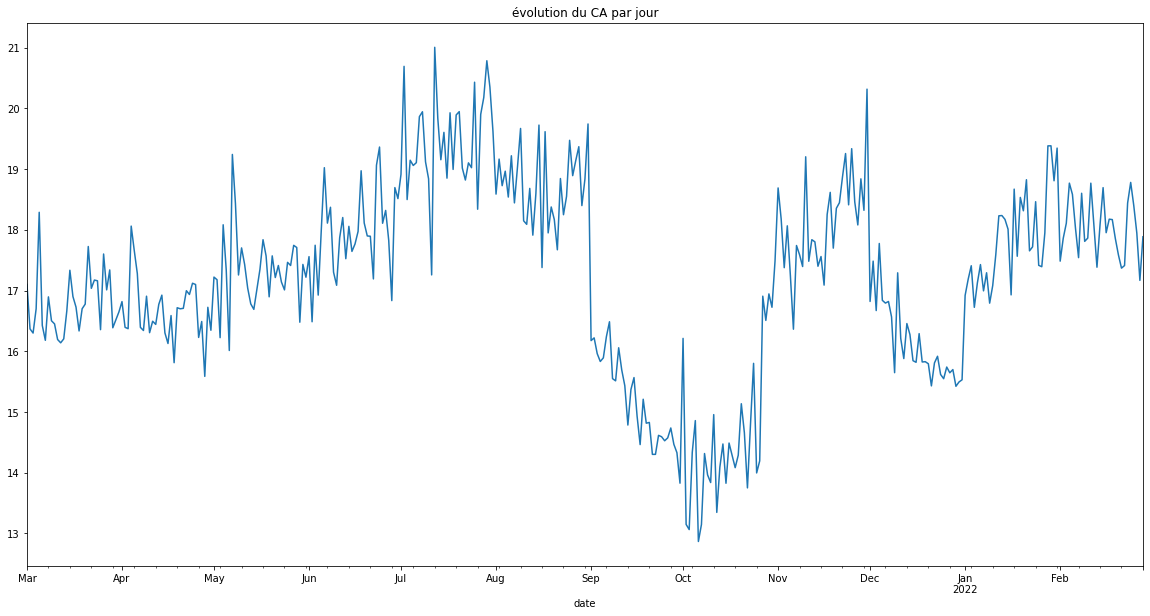

In [54]:
#moyenne par jour 
df_date_daily_mean = df_date.resample('D').mean()

df_date_daily_mean['price'].plot(figsize=(20, 10))
plt.title('évolution du CA par jour')
plt.show()

In [55]:
df_date_daily_mean

,price
date,
2021-03-01,17.100250
2021-03-02,16.368698
2021-03-03,16.300276
2021-03-04,16.700433
2021-03-05,18.289042
...,...
2022-02-24,18.781135
2022-02-25,18.402794
2022-02-26,17.946939


/Users/moradledmaoui/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

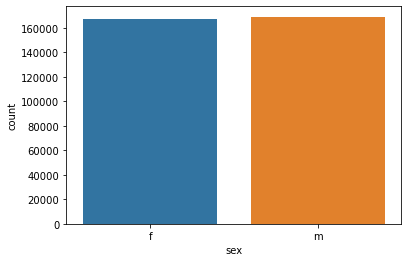

In [56]:
#variable genre 
sns.countplot(df['sex'])


 il y a autant de femmes que d'hommes

/Users/moradledmaoui/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='birth', ylabel='Density'>

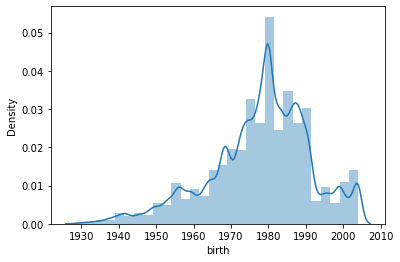

In [57]:
# la variable age
sns.distplot(df['birth'], bins=30)

In [61]:
# je converti les années de naissance en age
from datetime import datetime, date
  
# This function converts given date to age
def age(born):
    return datetime.today().year - born

df['Age'] = df['birth'].apply(age)
df.head()


,id_prod,date,session_id,client_id,price,categ,sex,birth,Age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977,44
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000,21
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979,42
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963,58
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980,41


In [62]:
datetime.today().year

2021

/Users/moradledmaoui/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

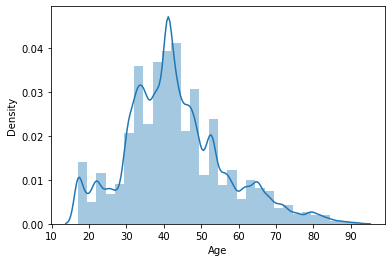

In [63]:
# la variable age
sns.distplot(df['Age'], bins=30)

## analyse bivariées  entre 2 variables quantitatives et correlation de pearson

La covariance empirique et le coefficient de corrélation

Devinez quoi ! L'indicateur que nous venons de construire est très utilisé en statistiques ; il s'appelle la covariance empirique de X et Y. Ce terme vous rappelle la variance empirique ? C'est normal : elles sont similaires. Effectivement, si vous calculez la covariance empirique de X et X, vous retombez sur la formule de la variance empirique de X, qui s'écrit  s2X=1n∑ni=1(x−x⎯⎯⎯)2
s
X
2
=
1
n
∑
i
=
1
n
(
x
−
x
¯
)
2
 . Magique !

Pour ramener la covariance empirique à une valeur qui soit comprise entre -1 et 1, alors on peut la diviser par le produit des écarts-types. Cette normalisation nous permet de faire des comparaisons. Ce qui nous donne

rX,Y=sX,YsXsY
r
X
,
Y
=
s
X
,
Y
s
X
s
Y
Ce coefficient r est appelé coefficient de corrélation, ou coefficient de corrélation linéaire, ou encore coefficient de corrélation de Pearson.




Text(0.5, 1.0, 'Scatter plot entre Age et le prix payé')

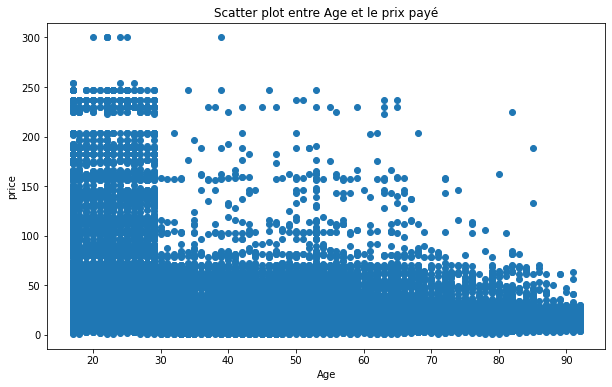

In [64]:
#correlation entre age et price
plt.figure(figsize=(10,6))
plt.scatter(df['Age'],df['price'], marker='o');
plt.xlabel('Age')
plt.ylabel('price')
plt.title('Scatter plot entre Age et le prix payé')

In [65]:
#coefficient de correlation de Pearson
import scipy.stats as st
import numpy as np

print(st.pearsonr(df["price"],df["Age"])[0])#Un couple de valeurs est renvoyé, le coefficient de corrélation est la premier élément de ce couple, d'où le  [0]
print(np.cov(df["price"],df["Age"],ddof=0)[1,0])#la matrice de covariance deuxième ligne 1ere colonne

-0.21152926170471423
-51.08094556500932


In [66]:
#test corrélation de pearson pour voir si les resultat sont significatif p value : hypothèse H0
# car le coeeficient n'est pas très bas 

on a une corrélation négative entre les deux variables : plus l'age est élevé moins les dépenses sur le site sont élevés

In [67]:

taille_classe = 10 # taille des classes pour la discrétisation

groupes = [] # va recevoir les données agrégées à afficher

# on calcule des tranches allant de 0 au solde maximum par paliers de taille taille_classe
tranches = np.arange(0, max(df["Age"]), taille_classe)
#tranches += taille_classe/2 # on décale les tranches d'une demi taille de classe
indices = np.digitize(df["Age"], tranches) # associe chaque solde à son numéro de classe

for ind, tr in enumerate(tranches): # pour chaque tranche, ind reçoit le numéro de tranche et tr la tranche en question
    montants = df.loc[indices==ind,"price"] # sélection des individus de la tranche ind
    if len(montants) > 0:
        g = {
            'valeurs': montants,
            'centre_classe': tr-(taille_classe/2),
            'taille': len(montants),
            'quartiles': [np.percentile(montants,p) for p in [25,50,75]]
        }
        groupes.append(g)

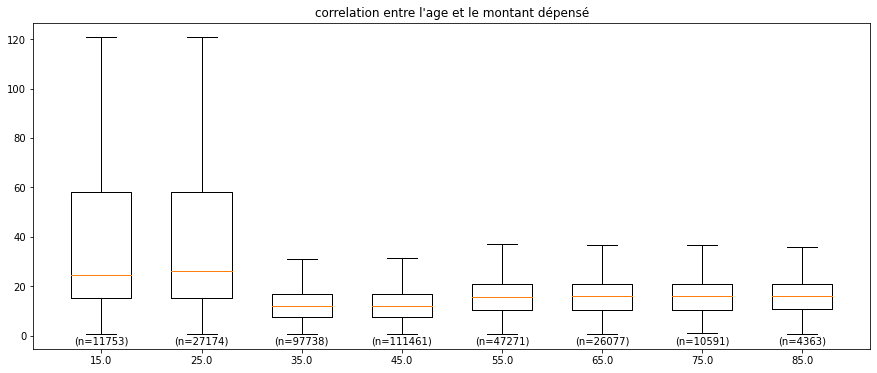

In [69]:
# affichage des boxplots
plt.figure(figsize=(15, 6))
plt.boxplot([g["valeurs"] for g in groupes],
            positions= [g["centre_classe"] for g in groupes], # abscisses des boxplots
            showfliers= False, # on ne prend pas en compte les outliers
            widths= taille_classe*0.6, # largeur graphique des boxplots
)
# affichage des effectifs de chaque classe
for g in groupes:
    plt.text(g["centre_classe"],0,"(n={})".format(g["taille"]),horizontalalignment='center',verticalalignment='top') 
plt.title("correlation entre l'age et le montant dépensé" )
plt.show()

In [70]:
tranches

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

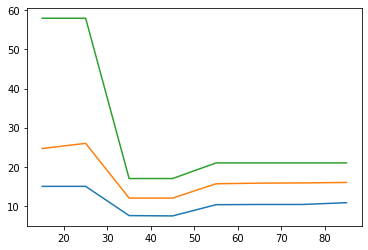

In [71]:
# affichage des quartiles
for n_quartile in range(3):
    plt.plot([g["centre_classe"] for g in groupes],
             [g["quartiles"][n_quartile] for g in groupes])
plt.show()

 ## correlation entre l'age et la catégorie 


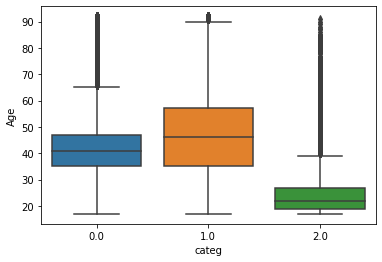

In [72]:
# correlation variable quanti(Age) et quali(catego) 
#on veut savoir si il y a une correlation entre la categorie d'achat et l'age 
X = "categ" # qualitative
Y = "Age" # quantitative

ax = sns.boxplot(x="categ", y="Age", data=df)

<AxesSubplot:title={'center':'Age'}, xlabel='categ'>

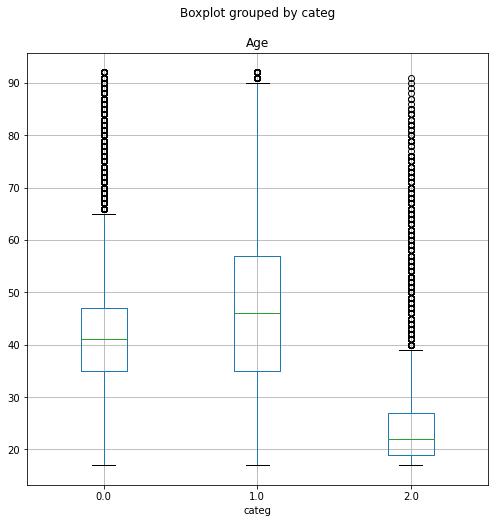

In [74]:

df.boxplot(column="Age",        # Column to plot
                 by= "categ",         # Column to split upon
                 figsize= (8,8))        # Figure size

In [ ]:
#faire les test de correlation de pearson et c'est tout 

En fonction de l'age les gens vont acheter des catégories différentes 

In [ ]:
#correlation entre deux variable quali (sex, categ) test chi2 

In [ ]:
# valeurs aberrantes faire des boxplot 
# prix par sex por comparer le montant hommes/femmes
# categories par sex
#diagrammme en barre 